In [1]:
#https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

In [2]:
dtypes = {
        'f_00':'float32',
        'f_01': 'float32',
        'f_02':'float32',
        'f_03': 'float32',
        'f_04':'float32',
        'f_05': 'float32',
        'f_06':'float32',
        'f_07': 'int8',
        'f_08':'int8',
        'f_09': 'int8',
        'f_10':'int8',
        'f_11': 'int8',
        'f_12':'int8',
        'f_13': 'int8',
        'f_14':'float32',
        'f_15': 'float32',
        'f_16':'float32',
        'f_17': 'float32',
        'f_18':'float32',
        'f_19': 'float32',
        'f_20':'float32',
        'f_21': 'float32',
        'f_22':'float32',
        'f_23': 'float32',
        'f_24':'float32',
        'f_25': 'float32',
        'f_26':'float32',
        'f_27': 'float32',
        'f_28':'float32',
        'f_29': 'float32',
         }
df = pd.read_csv('../data/raw/data.csv')
df.dtypes

id        int64
f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

In [3]:
int_cols = []
float_cols = []
for c,t in zip([col for col in df.columns], [col for col in df.dtypes]):
    if 'int' in str(t):
        if str(c) != 'id':
            int_cols.append(c)
    elif 'float' in str(t):
        float_cols.append(c)
    else:
        print(f'something went wrong for {c}')



In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,98000.0,48999.500000,28290.307527,0.000000,24499.750000,48999.500000,73499.250000,97999.000000
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000


# First impressions:
- f_00 to f_06 (float variabls) all seem to have mu = 0, sd = 1 approximately (standard normal)
- This is also approx the case for f_14 to f_21
- f_21 to f_28 seem to be a bit different, as the mu deviates a little more from 0, and the sd is clearly not 1. 
- f_07 to f_13 are different anyways, where f_09 jumps out due to large sd.

# Check correlation between variables

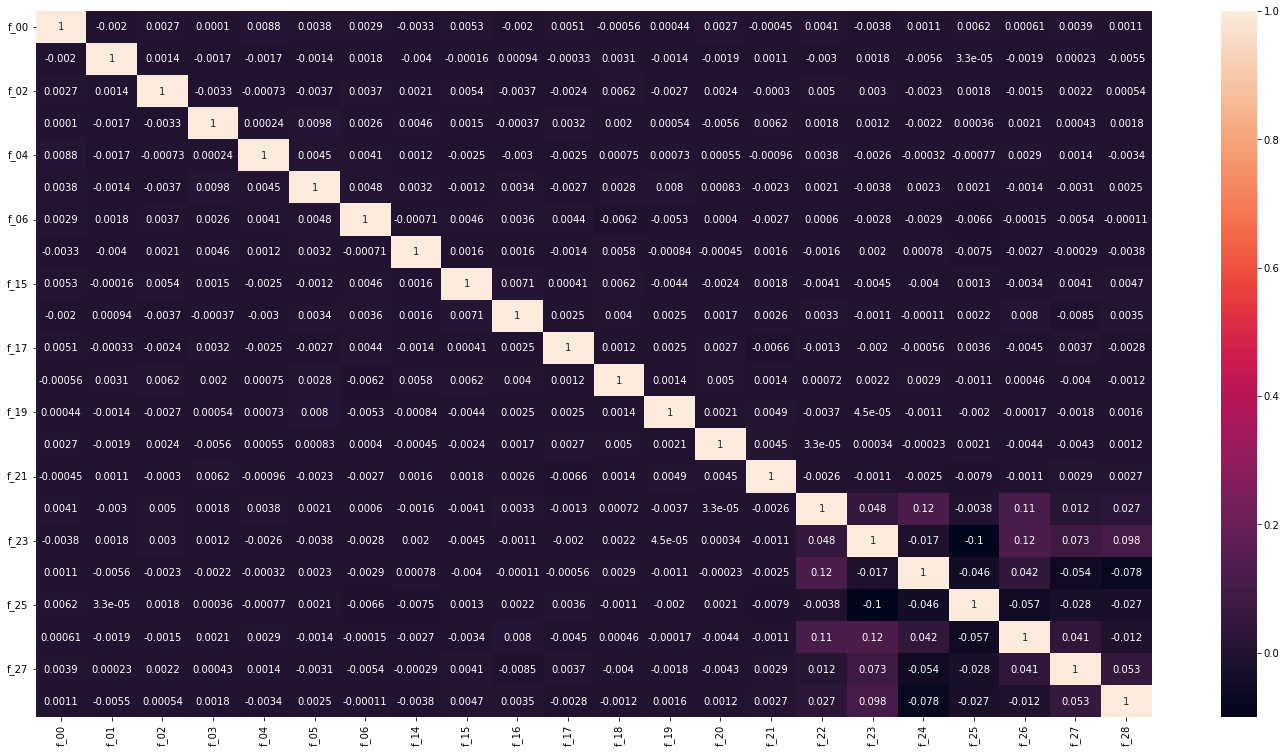

In [5]:
correlation_mat = df[float_cols].corr()
sns.heatmap(correlation_mat, annot = True)
plt.gcf().set_size_inches(25, 13)

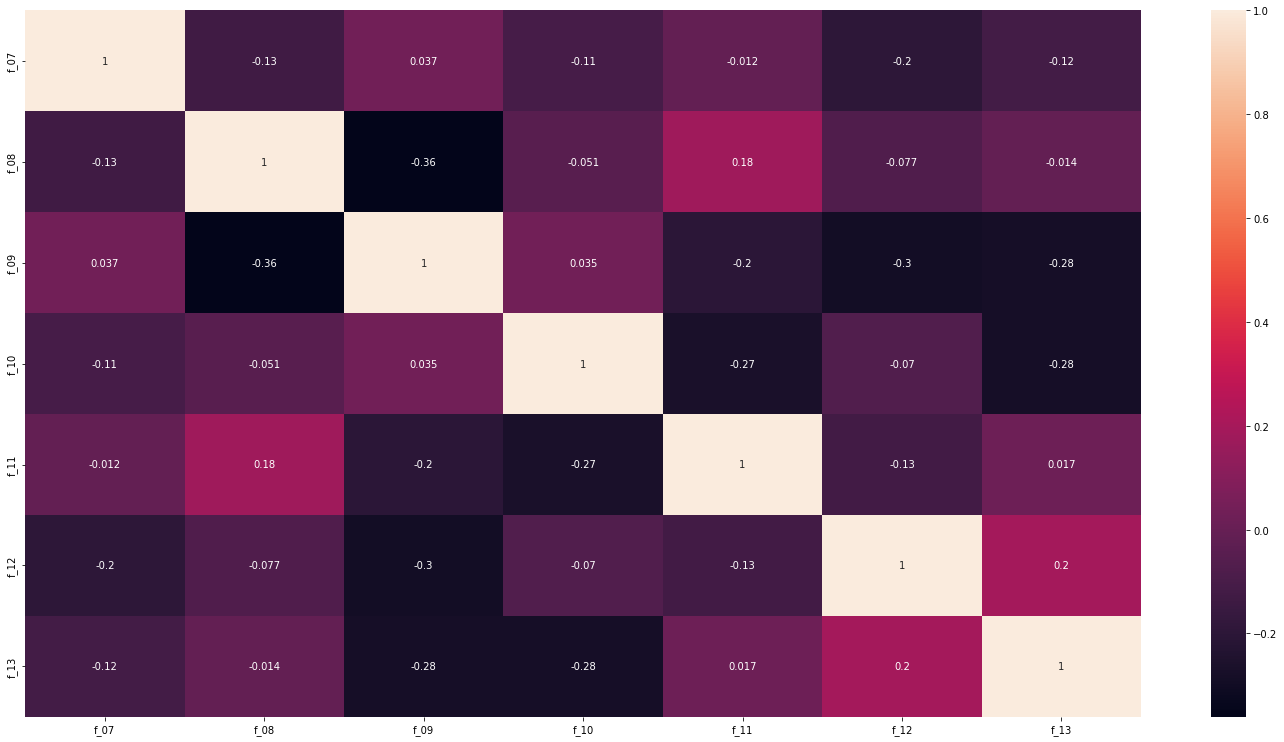

In [6]:
correlation_mat = df[int_cols].corr()
sns.heatmap(correlation_mat, annot = True)
plt.gcf().set_size_inches(25, 13)

In [7]:
"""
Cosine similarity amongst the integer columns:

Attention to:
- F08 and F11
- F12 and F13
"""

from scipy import spatial
df_int = df[int_cols]

result_list = []
for col in int_cols:
    List1 = np.array(df_int).T
    List2 = np.array(df_int[col])

    similarity_scores = List1.dot(List2)/ (np.linalg.norm(List1, axis=1) * np.linalg.norm(List2))

    result_list.append(similarity_scores)
result_list

[array([1.        , 0.67119476, 0.68720961, 0.68923659, 0.73564694,
        0.64760604, 0.66048987]),
 array([0.67119476, 1.        , 0.58099741, 0.72255135, 0.79963259,
        0.7009192 , 0.70862719]),
 array([0.68720961, 0.58099741, 1.        , 0.71119722, 0.66546687,
        0.59574113, 0.58813702]),
 array([0.68923659, 0.72255135, 0.71119722, 1.        , 0.70462209,
        0.71316554, 0.64481587]),
 array([0.73564694, 0.79963259, 0.66546687, 0.70462209, 1.        ,
        0.72117917, 0.74660014]),
 array([0.64760604, 0.7009192 , 0.59574113, 0.71316554, 0.72117917,
        1.        , 0.76556726]),
 array([0.66048987, 0.70862719, 0.58813702, 0.64481587, 0.74660014,
        0.76556726, 1.        ])]

- No strong correlations found in float variables, some very weak ones in the int variables (however, those are less reliable due to the nature of pearson correlation coefficient.

# Next up: check distribution for all variables.

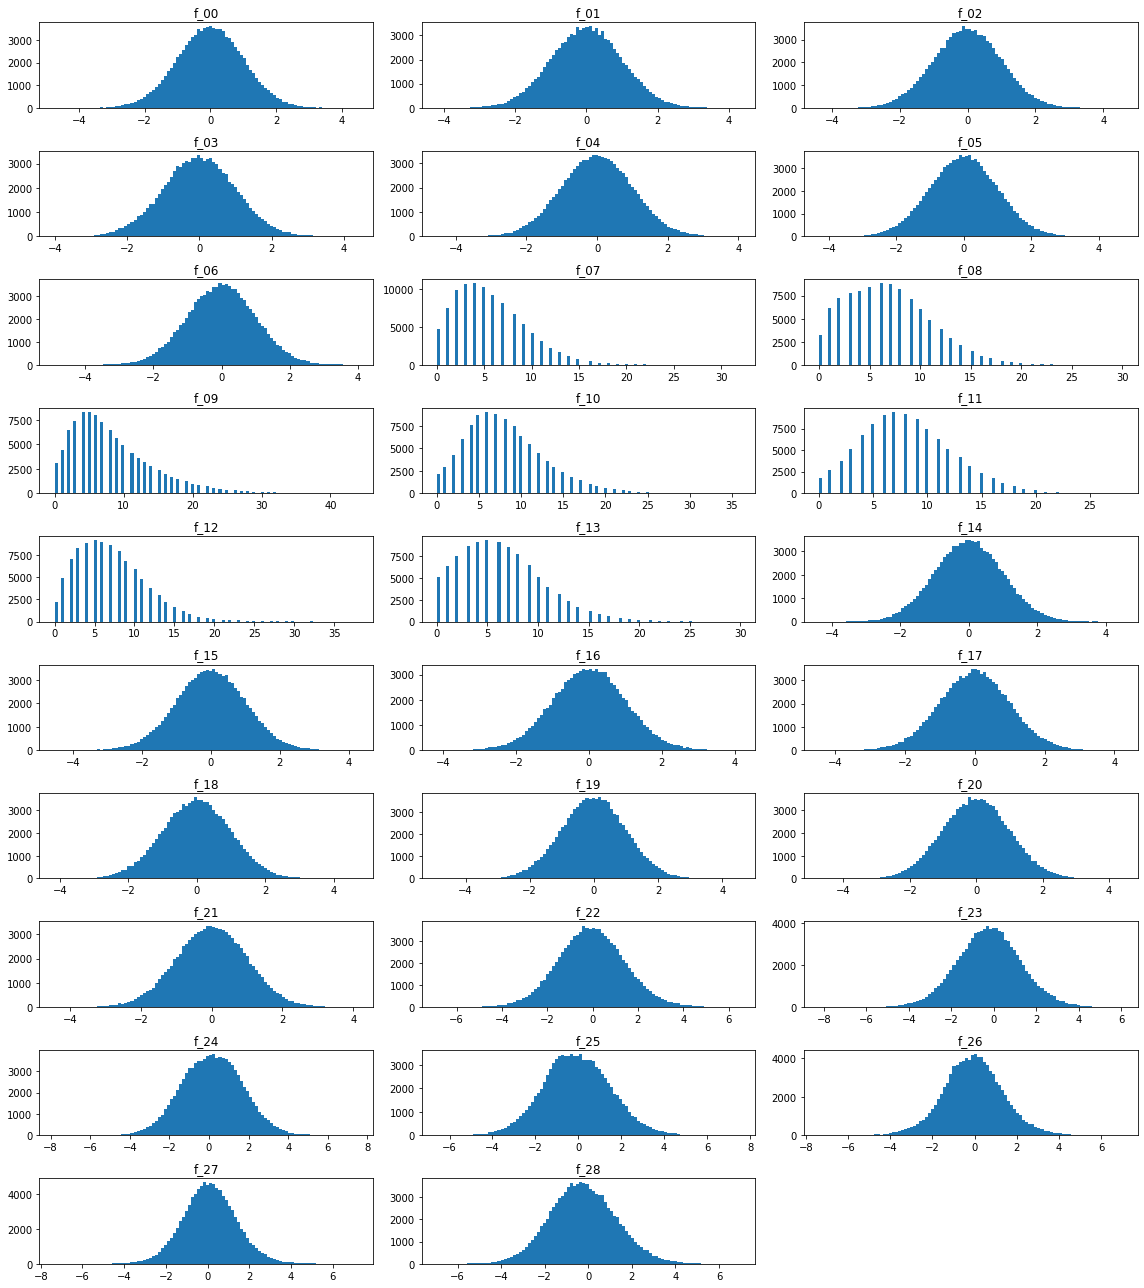

In [8]:
figure = plt.figure(figsize=(16, 18))
featCount = 29
for i in range(featCount):
    if i < 10:
        feat_name = 'f_0' + str(i)
    else:
        feat_name = 'f_' + str(i)
    plt.subplot(10, 3, i+1)
    plt.hist(df[feat_name], bins=100)
    plt.title(f'{feat_name}')
figure.tight_layout(h_pad=1.0, w_pad=1.0)
plt.show()

In [9]:
"""
Shapiro-wilk: null-hypothesis states the variable is normally distributed.
scipy docs: 

The algorithm used is described in [4] but censoring parameters as described are not implemented. For N > 5000 the W test statistic is accurate but the p-value may not be.

The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.
"""
not_reject_list = []
reject_list = []
alpha = 0.05 #95% confidence interval
for col in float_cols:
    p_value = stats.shapiro(df[col]).pvalue
    if p_value >= alpha:
        not_reject_list.append(col)
    else:
        print(p_value)
        reject_list.append(col)
print(f'We have no evidence {len(not_reject_list)} columns are not normally distributed.')
print(f'{len(reject_list)} columns reject null hypothesis, are not normally distributed')
reject_list

/home/jesse/Github/TabularPlaygroundSeries/venv/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


5.754254799701045e-16
6.267770590734356e-13
9.434243253281238e-08
9.014024701262268e-17
4.429073159694591e-36
1.8635848995188873e-36
2.838907449854146e-20
We have no evidence 15 columns are not normally distributed.
7 columns reject null hypothesis, are not normally distributed


['f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

- Not coincidentally, f22 to f28 are rejected, indicating they are not normally distributed. This can be seen from the slight difference in shape, as well as the tables earlier, indicating these variables differ from, lets say f1 and f2.

In [10]:
# We expect f22 to f28, as well as all the integer cols to be the most important, therefore we set a boolean variable
# for ease of use to indicate whether we want to use only these variables or not.
use_important_cols_only = True
important_float_cols = ['f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
if use_important_cols_only:
    df_pred = df[int_cols + important_float_cols]
else:
    df_pred = df[float_cols + int_cols]

In [11]:
scale_data = True
if scale_data:
    scaler = PowerTransformer()
    scaler.fit(df_pred)
    df_pred = scaler.transform(df_pred)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


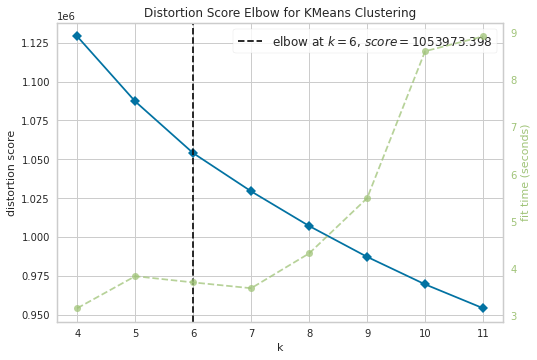

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pred)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

covariance_type_list = ['full', 'tied', 'diag', 'spherical']
result_list = {}
top_score = 1000000000

for covariance_type in covariance_type_list:
    X = df_pred
    gm = GaussianMixture(n_components=6, covariance_type=covariance_type, random_state=0).fit(X)
    pred = gm.predict(X)
    score = gm.bic(X)
    result_list[covariance_type] = score
    if score <= top_score:
        top_score = score
        print(f'covariance_type {covariance_type} scores best, scores: {top_score}')

covariance_type full scores best, scores: 3679619.743606119


In [14]:
X = df_pred
gm = GaussianMixture(n_components=6, covariance_type='full', random_state=0).fit(X)
pred = gm.predict(X)
score = gm.bic(X)
score

3679619.743606119

In [16]:
pred

array([3, 4, 3, ..., 2, 1, 4])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = X['f_24']
y = X['f_25']
Cluster = pred
centers = np.random.randn(4, 2)

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=50)

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [22]:
submission_df = pd.DataFrame({'Id': df['id'].tolist(), 'Predicted': pred})

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
submission_df